## Analysis of Crminal Incidient Data in Seattle

### Overview

In this project, we will analyze criminal incident data from Seattle to visualize and compare patterns. The objective is to use data visulization skills to help people better understand the dataset. The following questions need to be answered through analysis.
* How do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
* How do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
* How do incidents vary month to month in the Summer 2014 dataset?
* Which incident types tend to correlate with each other on a day-by-day basis?

### Dataset Overview
The dataset is the real crime data of Seattle from Summer 2014, including 32779 records with 19 variables.
### Incidents vs Time
How do incidents vary by time of day? 

The number of incidents peak at noon and mid-night. Generally, it increase from 0 to 24.

Which incidents are most common in the evening? During what periods of the day are robberies most common?

CAR PROWL is the most common incident in the evening. Around 10 PM, the robbery is the most common.


/Users/yanshi/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


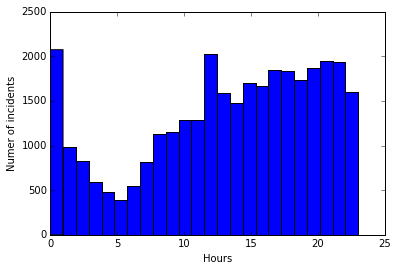

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

data = pd.read_csv('seattle_incidents_summer_2014.csv')
occur_hour = [pd.to_datetime(h).hour for h in data['Occurred Date or Date Range Start']]
incident_type = data['Summarized Offense Description']
plt.hist(occur_hour, 24)
plt.xlabel('Hours')
plt.ylabel('Numer of incidents')
plt.savefig('incident_vs_time.pdf', format='pdf')

CAR PROWL


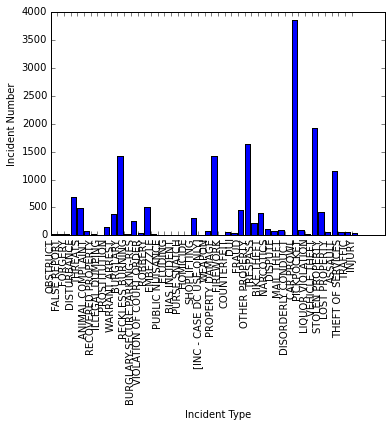

In [2]:
# Which incident is most commons in the evening?
ind1 = np.array(occur_hour) >= 18 
ind2 = np.array(occur_hour) <= 6
m_even = incident_type[ind1].append(incident_type[ind2])
m_set = set(m_even)
m_num = [sum(m_even == x) for x in m_set]
fig=plt.bar(range(0,len(m_num)),m_num)
plt.xticks(range(0,len(m_num)),list(m_set), rotation='vertical')
plt.xlabel('Incident Type')
plt.ylabel('Incident Number')
plt.savefig('Q2.pdf', format='pdf')
print list(m_set)[m_num.index(max(m_num))]

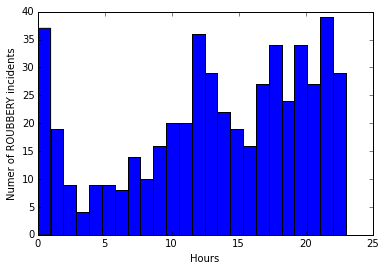

In [3]:
#During what periods of the day are robberies most common?
occur_hour = np.array(occur_hour)
m_rob = occur_hour[np.array(m_even) == 'ROBBERY']
plt.hist(m_rob, 24)
plt.xlabel('Hours')
plt.ylabel('Numer of ROUBBERY incidents')
plt.savefig('Q3.pdf', format='pdf')

### Incidents vs Neightborhood
How do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?

From B to W, there are several lows and peaks. Suppose B is the city center, then CAR PROWL is the most common incident. Robberies or thefts are most common at K area.


M


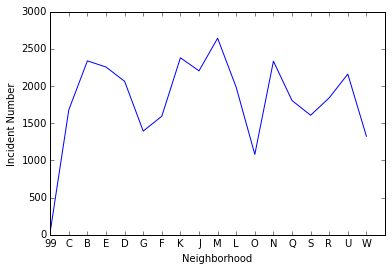

In [28]:
#How do incidents vary by neighborhood?
nebh = data['District/Sector']
tmp = set(nebh)
m_nebh = list(tmp)[1:]
m_nebh_num = [sum(np.array(nebh) == x) for x in m_nebh]
fig=plt.plot(range(0,len(m_nebh_num)),m_nebh_num)
plt.xticks(range(0,len(m_nebh_num)),list(m_nebh))
plt.xlabel('Neighborhood')
plt.ylabel('Incident Number')
plt.savefig('Q4.pdf', format='pdf')
print list(m_nebh)[m_nebh_num.index(max(m_nebh_num))]

CAR PROWL


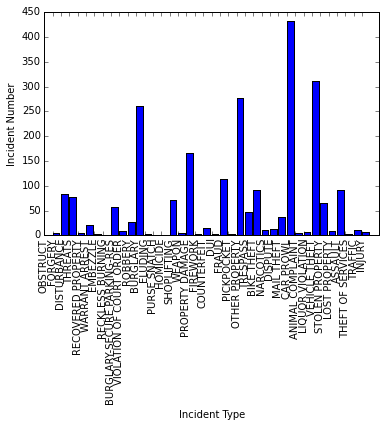

In [38]:
# Which incidents are most common in the city center?
# Suppose B is the city center

m_even_nebh = incident_type[np.array(nebh) == "B"]
m_set_nebh = set(m_even_nebh)
m_num_nb = [sum(np.array(m_even_nebh) == x) for x in m_set_nebh]
fig=plt.bar(range(0,len(m_num_nb)),m_num_nb)
plt.xticks(range(0,len(m_num_nb)),list(m_set_nebh), rotation='vertical')
plt.xlabel('Incident Type')
plt.ylabel('Incident Number')
plt.savefig('Q5.pdf', format='pdf')
print list(m_set)[m_num.index(max(m_num))]

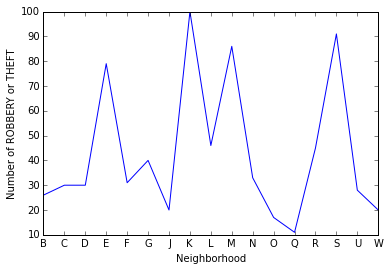

In [69]:
# In what areas or neighborhoods are robberies or thefts most common?
ind1 = np.array(incident_type) == 'ROBBERY'
ind2 = np.array(incident_type) == "THEFT"
m_rob_theft = nebh[ind1].append(nebh[ind2])

rob_tmp = pd.DataFrame(data=m_rob_theft.values)
rob_tmp.columns = ['ROB']
m_rt = rob_tmp.groupby('ROB').size()

fig=plt.plot(range(0,len(m_rt)),m_rt.values)
plt.xticks(range(0,len(m_rt)),list(m_rt.index))
plt.xlabel('Neighborhood')
plt.ylabel('Number of ROBBERY or THEFT')
plt.savefig('Q6.pdf', format='pdf')

### Incidents vs Month
How do incidents vary month to month in the Summer 2014 dataset?

Generally, the number of incidents is the same for June and July. August is a little lower.

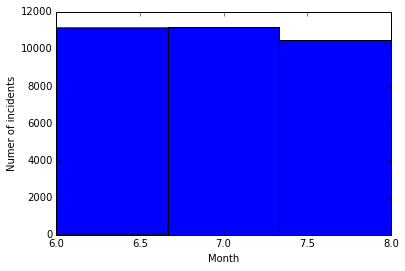

In [70]:
# How do incidents vary month to month in the Summer 2014 dataset?
occur_month = [pd.to_datetime(h).month for h in data['Occurred Date or Date Range Start']]
plt.hist(occur_month, 3)
plt.xlabel('Month')
plt.ylabel('Numer of incidents')
plt.savefig('Q7.pdf', format='pdf')